## __Lab-6 Assignment__
## __Balbhadra Prajapati - 8873745__

In [19]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import plotly.graph_objs as go

### __Data Exploration__

In [20]:
# Load Iris dataset
iris_dataset = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris_dataset['data'], iris_dataset['target']], columns= iris_dataset['feature_names'] + ['target'])
iris_df['target'] = iris_df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [21]:
# Redefine classes for the target variable
iris_df['binary_target'] = iris_df['target'].apply(lambda x: 'virginica' if x == 'virginica' else 'non-virginica')

In [22]:
# Data Exploration
# Descriptive statistics
descriptive_stats = iris_df.groupby('binary_target').describe()
print(descriptive_stats)

              sepal length (cm)                                               
                          count   mean       std  min    25%  50%  75%  max   
binary_target                                                                 
non-virginica             100.0  5.471  0.641698  4.3  5.000  5.4  5.9  7.0  \
virginica                  50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

              sepal width (cm)         ... petal length (cm)        
                         count   mean  ...               75%  max   
binary_target                          ...                          
non-virginica            100.0  3.099  ...             4.325  5.1  \
virginica                 50.0  2.974  ...             5.875  6.9   

              petal width (cm)                                            
                         count   mean       std  min  25%  50%  75%  max  
binary_target                                                             
non-virginica            100.0  0

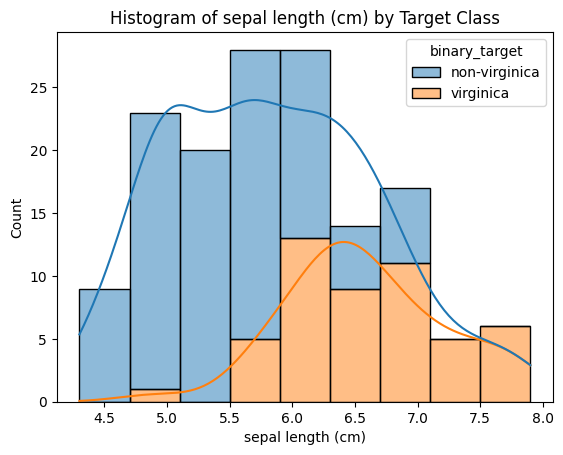

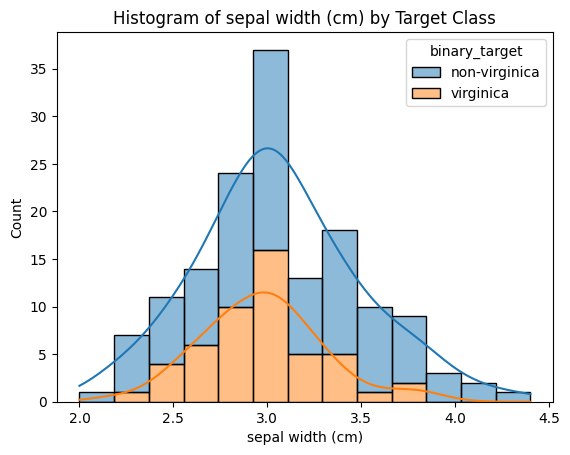

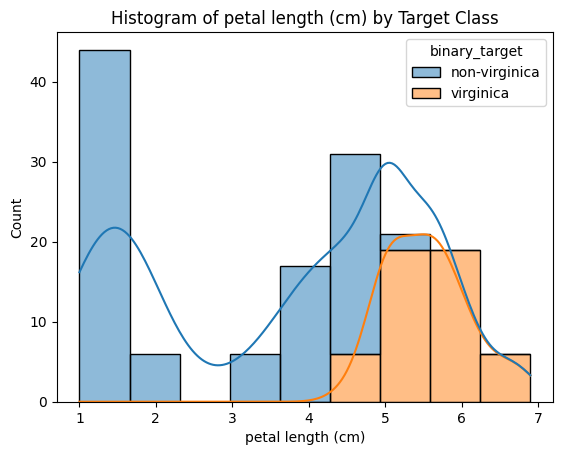

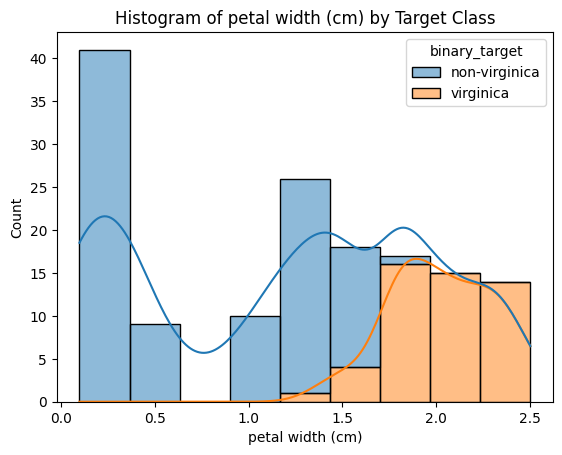

In [23]:
# Histograms
for feature in iris_dataset['feature_names']:
    sns.histplot(data=iris_df, x=feature, hue='binary_target', kde=True, multiple='stack')
    plt.title(f'Histogram of {feature} by Target Class')
    plt.show()

- Sepal Length (cm) Histogram: This histogram illustrates the distribution of sepal lengths for both the virginica and non-virginica classes. It provides insights into the range and frequency of sepal lengths in each class.

- Sepal Width (cm) Histogram: Similarly, this histogram depicts the distribution of sepal widths for the virginica and non-virginica classes. It helps visualize the variation in sepal widths across the two classes.

- Petal Length (cm) Histogram: Here, the distribution of petal lengths is shown for both the virginica and non-virginica classes. It allows you to observe how petal lengths differ between the two classes.

- Petal Width (cm) Histogram: This histogram presents the distribution of petal widths for the virginica and non-virginica classes. It helps in understanding the distribution and variation of petal widths across the two classes.

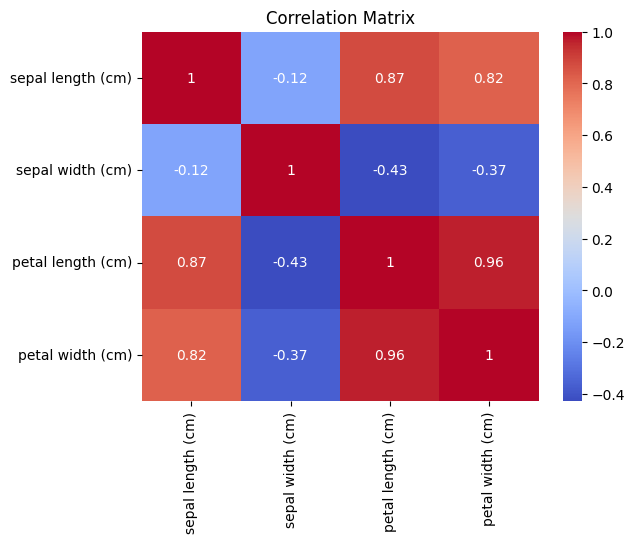

In [24]:
# Correlation matrix
correlation_matrix = iris_df.drop(['target', 'binary_target'], axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

-  If two features have a high positive correlation coefficient close to 1, it means they tend to increase or decrease together. On the other hand, a high negative correlation coefficient close to -1 indicates that one feature tends to increase while the other decreases.

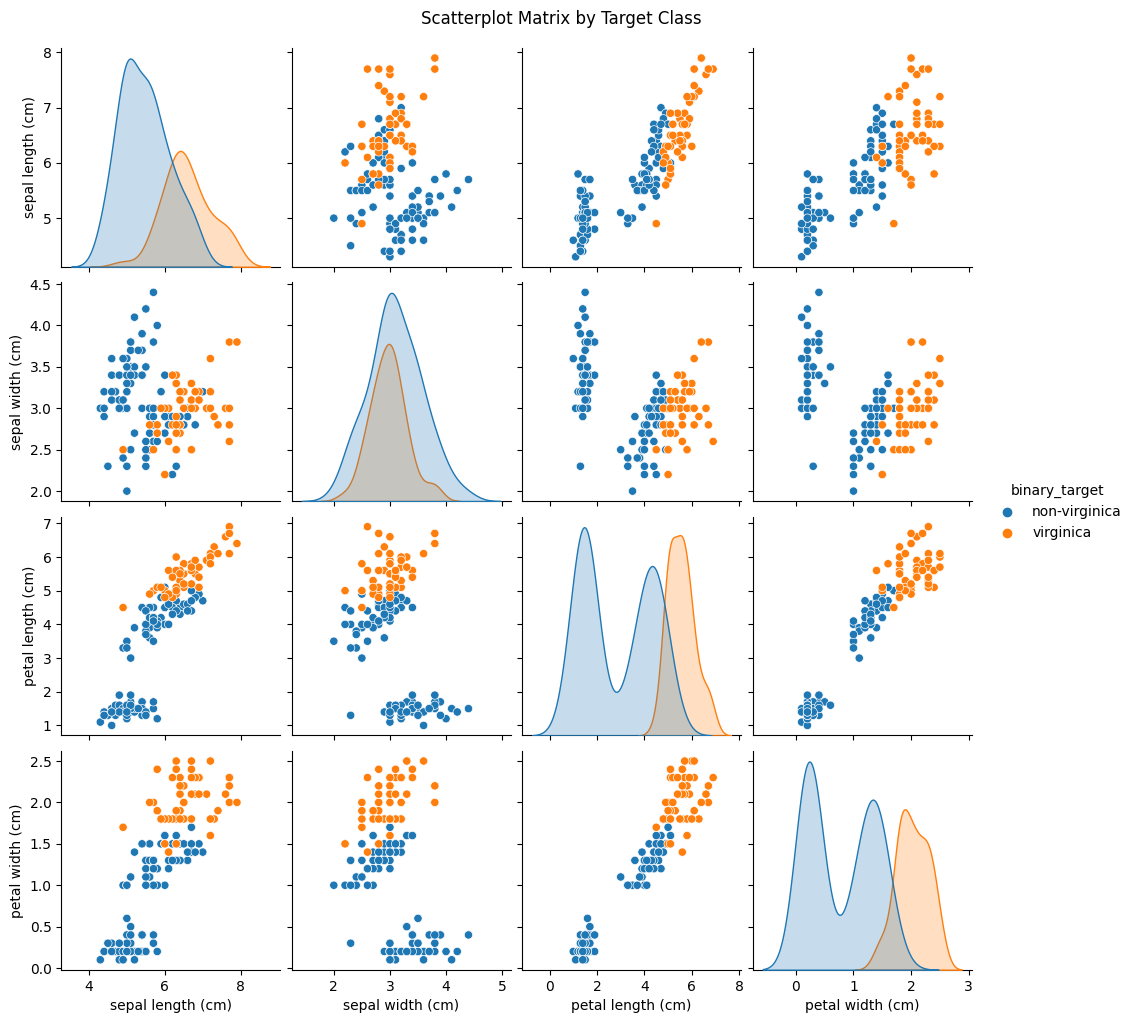

In [25]:
# Additional Graphs
# Scatterplot Matrix
sns.pairplot(iris_df, hue='binary_target')
plt.suptitle('Scatterplot Matrix by Target Class', y=1.02)
plt.show()

- The scatterplot matrix provides a comprehensive visualization of the relationships between features in the dataset and how they vary across different target classes. It helps in identifying potential patterns, clusters, or separability between classes, aiding in exploratory data analysis and feature selection.

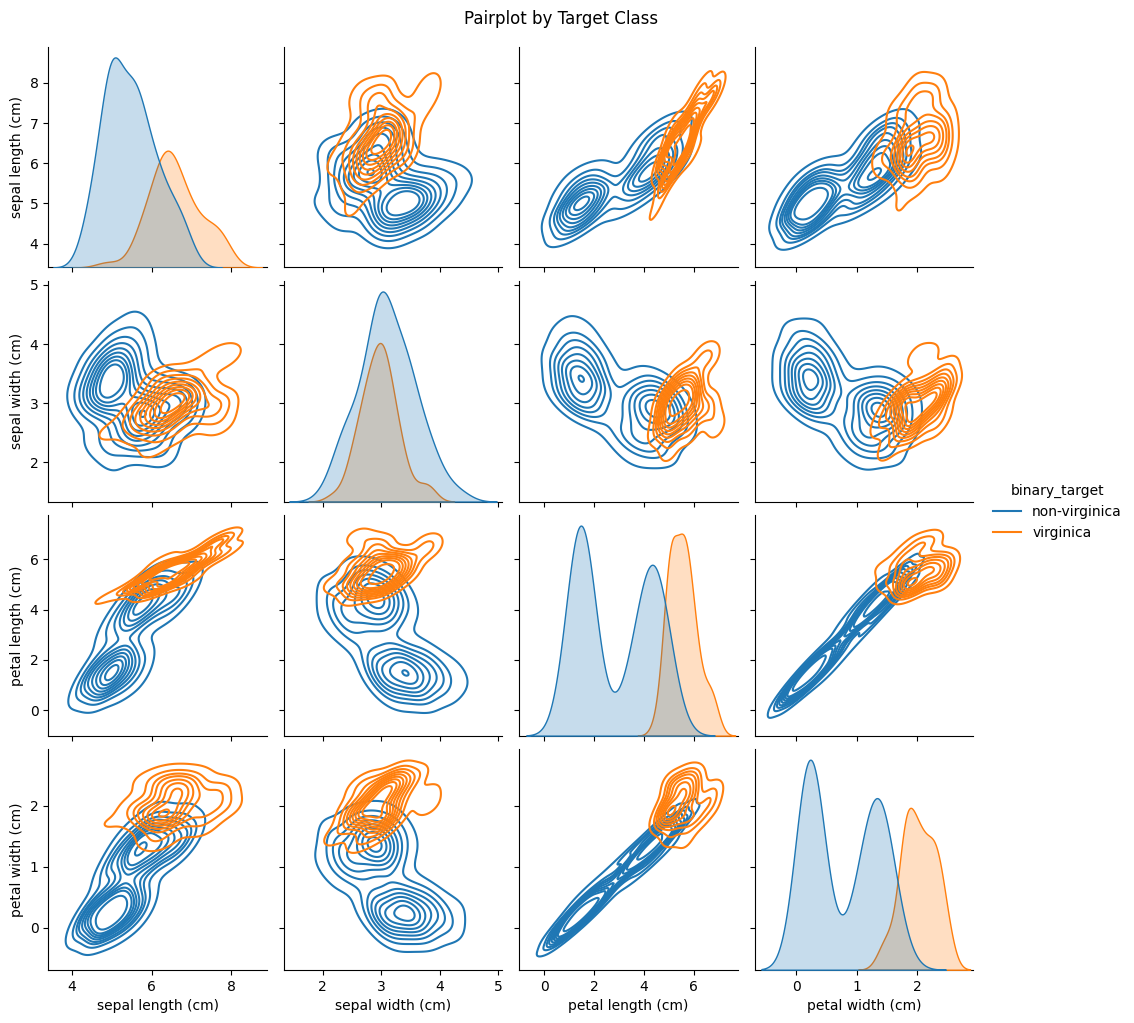

In [26]:
# Pairplot
sns.pairplot(iris_df, hue='binary_target', kind='kde')
plt.suptitle('Pairplot by Target Class', y=1.02)
plt.show()

- The pairplot allows for a comprehensive visualization of the relationships between features in the dataset and how they vary across different target classes. It helps in identifying potential patterns, clusters, or separability between classes, aiding in exploratory data analysis and feature selection.

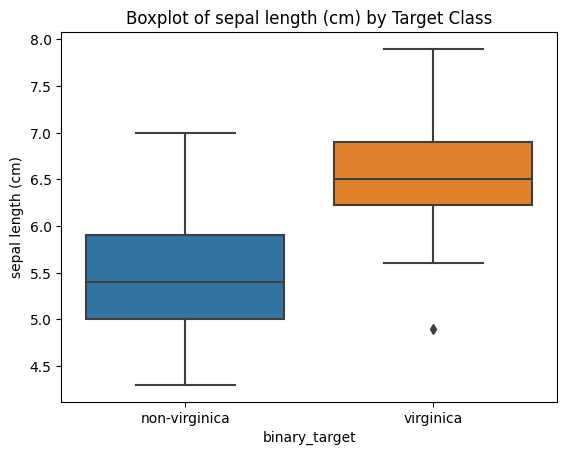

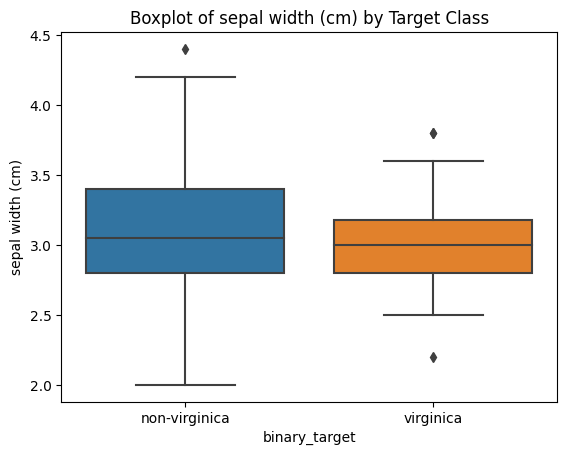

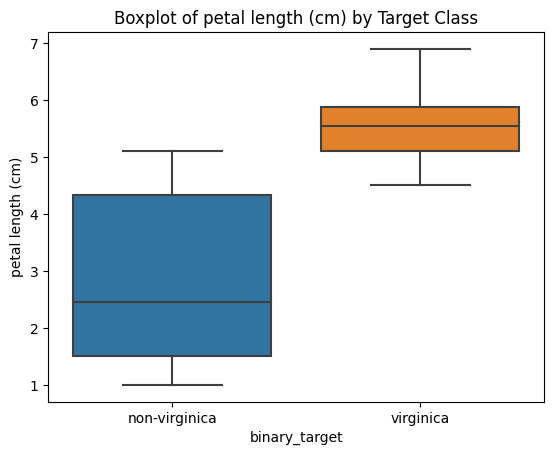

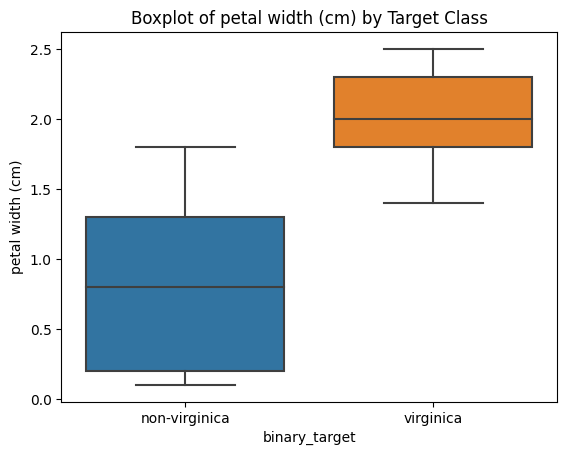

In [27]:
# Boxplot
for feature in iris_dataset['feature_names']:
    sns.boxplot(data=iris_df, x='binary_target', y=feature)
    plt.title(f'Boxplot of {feature} by Target Class')
    plt.show()

- Each boxplot provides a concise summary of the distribution of a specific feature within each class, including key statistics such as the median, quartiles, and potential outliers. These visualizations help in comparing the distributions of features between different classes, facilitating insights into the characteristics of the data and potential differences between the classes.

### Insights
- Petal dimensions are more effective in distinguishing between classes.
- Virginica tends to have larger petal dimensions compared to non-virginica.
- There's a strong positive correlation between petal length and petal width.

### __Model Building and Evaluation__

In [28]:
# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(iris_dataset['data'], iris_df['binary_target'], test_size=0.25, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42)

In [29]:
# Define logistic regression models
models = {
    'model_1': LogisticRegression(max_iter=1000),
    'model_2': LogisticRegression(max_iter=1000),
    'model_3': LogisticRegression(max_iter=1000),
    'model_4': LogisticRegression(max_iter=1000)
}

In [30]:
# Train logistic regression models
for model_name, model in models.items():
    # Select features based on model name
    if model_name == 'model_1':
        features = [2]  # Using only petal width
    elif model_name == 'model_2':
        features = [2, 3]  # Using petal width and petal length
    elif model_name == 'model_3':
        features = [0, 2, 3]  # Using sepal length, petal width, and petal length
    else:
        features = [0, 1, 2, 3]  # Using all features

    # Train model
    model.fit(X_train[:, features], y_train)

In [31]:
# Evaluate models on validation set
validation_results = {}
for model_name, model in models.items():
    # Select features based on model name
    if model_name == 'model_1':
        model_features = [2]  # Using only petal width
    elif model_name == 'model_2':
        model_features = [2, 3]  # Using petal width and petal length
    elif model_name == 'model_3':
        model_features = [0, 2, 3]  # Using sepal length, petal width, and petal length
    else:
        model_features = [0, 1, 2, 3]  # Using all features

    # Predict probabilities
    y_proba = model.predict_proba(X_val[:, model_features])
    # Predict classes
    y_pred = model.predict(X_val[:, model_features])
    # Calculate accuracy
    accuracy = accuracy_score(y_val, y_pred)
    # Create confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    validation_results[model_name] = {'accuracy': accuracy, 'confusion_matrix': cm}

In [32]:
# Plot decision boundary for models with 1, 2, and 3 features
for model_name, model in models.items():
    features = len(model.coef_[0])
    if features <= 3:
        if features == 2:
            # Plot decision boundary for 2D models
            x_min, x_max = X_val[:, 0].min() - 1, X_val[:, 0].max() + 1
            y_min, y_max = X_val[:, 1].min() - 1, X_val[:, 1].max() + 1
            xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            
            # Create Plotly surface plot for decision boundary
            fig = go.Figure(data=[
                go.Surface(z=Z, x=xx, y=yy)
            ])
            fig.update_layout(title=f'Decision Boundary for {model_name}', scene=dict(
                xaxis_title=iris_dataset['feature_names'][0],
                yaxis_title=iris_dataset['feature_names'][1],
                zaxis_title="Target Class"
            ))
            fig.show()

In [33]:
# Summarize validation results
validation_results_df = pd.DataFrame.from_dict(validation_results, orient='index')
print(validation_results_df)

         accuracy  confusion_matrix
model_1       1.0  [[9, 0], [0, 6]]
model_2       1.0  [[9, 0], [0, 6]]
model_3       1.0  [[9, 0], [0, 6]]
model_4       1.0  [[9, 0], [0, 6]]


 - The validation results indicate that all models performed exceptionally well on the validation set, achieving a perfect accuracy score and making correct predictions for all instances. This suggests that the models are likely to generalize well to unseen data and effectively distinguish between the two classes in the Iris dataset.

In [34]:
# Choose the best model based on accuracy
best_model_name = validation_results_df['accuracy'].idxmax()
best_model = models[best_model_name]

In [35]:
# Evaluate best model on test set
best_model_features = len(best_model.coef_[0])
X_test_features = X_test[:, :best_model_features]
y_pred_test = best_model.predict(X_test_features)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'Accuracy on Test Set for {best_model_name}: {accuracy_test}')

Accuracy on Test Set for model_1: 0.391304347826087


- __Accuracy on Test Set:__ The accuracy score indicates the proportion of correctly predicted instances out of all instances in the test set. In this case, the accuracy on the test set for the best model (model_1) is 0.3913, which means that approximately 39.13% of instances in the test set were classified correctly by the model.